In [ ]:
!pip install umap-learn hdbscan
!pip install phate scprep s_gd2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import decomposition
cmap='BuGn_r'
lol= ['#a61551','#d9424d','#f67b4a','#febf6f','#feefa4','#f2f9a9','#bee5a0','#75c8a5','#388eba','#5e50a2']

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 5.2 MB 35.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 55.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=1f548ab231f19cce849393003f50e3e1e3372bbf28964a62c2455bd5502f414e
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=5524ab442bc331382aad0b880640a38df59f2ce27022d3c4b210de2bde8e16c4
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330753 sha256=ff00e14b1d0239b98975c8b9518a384b99df37568cf47ff10bfca7574b231f02
  St

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import umap

sns.set(context="paper", style="white")

mnist = fetch_openml("mnist_784", version=1)
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, stratify=mnist.target, random_state=42,train_size=0.9
)

In [ ]:
sns.set(context="paper", style="white")


In [ ]:
import s_gd2
from scipy.spatial.distance import pdist, squareform

In [ ]:
def sgd(D, n_components=2, random_state=None, init=None,num_dimensions=None):
    """Metric MDS using stochastic gradient descent
    Parameters
    ----------
    D : array-like, shape=[n_samples, n_samples]
        pairwise distances
    n_components : int, optional (default: 2)
        number of dimensions in which to embed `D`
    random_state : int or None, optional (default: None)
        numpy random state
    init : array-like or None
        Initialization algorithm or state to use for MMDS
    Returns
    -------
    Y : array-like, embedded data [n_sample, ndim]
    """

    N = D.shape[0]
    D = squareform(D)
    # Metric MDS from s_gd2
    Y = s_gd2.mds_direct(N, D, init=init, random_seed=random_state,num_dimensions=num_dimensions)
    return Y

In [ ]:
from sklearn import decomposition
#Dimensionality reduction using PCA, denoise and better capture of the global structure 
#of the data for UMAP proyection
pca = decomposition.PCA(n_components=500,random_state=1)
pca.fit(X_test)
X = pca.transform(X_test)
print(X.shape)


(7000, 500)


In [ ]:
knn= 30
decay= 15
t=5
distance_matrix_dist =pdist(X)
distance_matrix_u_pca = (squareform(distance_matrix_dist))
n,m =distance_matrix_u_pca.shape

E = np.zeros((m,m))
knn_dst = np.sort(distance_matrix_u_pca, axis=1)
    
epsilon = knn_dst[:,knn]
    
    
pdx_scale = (distance_matrix_u_pca / epsilon).T 
    
E = np.exp(-1 * ( pdx_scale ** decay))
    
print(' afinity matrix done')
    
A = (E + E.T)
    
diff_deg = np.diag(np.sum(A,0))
    
diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

new_matrix_pca =  np.linalg.matrix_power(diff_op, t)

 afinity matrix done


In [ ]:
fit = umap.UMAP(n_components =60,random_state=1,metric='cosine',verbose=True,n_neighbors=5,min_dist=0.3,n_epochs=10000)
%time u_pca_umap = fit.fit_transform(X)

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0.3, n_components=60, n_epochs=10000, n_neighbors=5, random_state=1, verbose=True)
Mon Mar  7 01:46:49 2022 Construct fuzzy simplicial set
Mon Mar  7 01:46:49 2022 Finding Nearest Neighbors
Mon Mar  7 01:46:49 2022 Building RP forest with 9 trees


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Mon Mar  7 01:46:53 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	Stopping threshold met -- exiting after 5 iterations
Mon Mar  7 01:47:09 2022 Finished Nearest Neighbor Search
Mon Mar  7 01:47:12 2022 Construct embedding


Epochs completed:   0%|            0/10000 [00:00]

Mon Mar  7 01:54:20 2022 Finished embedding
CPU times: user 7min 27s, sys: 4.35 s, total: 7min 31s
Wall time: 7min 31s


In [ ]:
knn= 50
decay= 15
t=10
distance_matrix_dist =pdist(u_pca_umap)
distance_matrix_u_pca = (squareform(distance_matrix_dist))
n,m =distance_matrix_u_pca.shape

E = np.zeros((m,m))
knn_dst = np.sort(distance_matrix_u_pca, axis=1)
    
epsilon = knn_dst[:,knn]
    
    
pdx_scale = (distance_matrix_u_pca / epsilon).T 
    
E = np.exp(-1 * ( pdx_scale ** decay))
    
print(' afinity matrix done')
    
A = (E + E.T)
    
diff_deg = np.diag(np.sum(A,0))
    
diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

new_matrix_pca_umap_diff =  np.linalg.matrix_power(diff_op, t)

 afinity matrix done


In [ ]:
pca_umap_diff_distancematrix =squareform(pdist(new_matrix_pca_umap_diff))
pca_diff_distancematrix =squareform(pdist(new_matrix_pca))



In [ ]:
pca_distancematrix =squareform(pdist(X))


In [ ]:
np.array(y_train).astype('int')

array([9, 9, 6, ..., 6, 9, 9])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbd549c6d0>]],
      dtype=object)

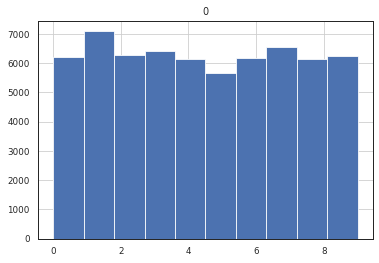

In [ ]:
pd.DataFrame(np.array(y_train).astype('int')).hist(bins=10)

In [ ]:

from hdbscan import HDBSCAN

min_cluster_size = 200
min_samples = 20

hdbscan_pca= HDBSCAN(min_cluster_size, min_samples, allow_single_cluster = True,metric='precomputed')
labels = hdbscan_pca.fit_predict(pca_diff_distancematrix)

labels

array([ 0, -1, -1, ...,  0,  0,  0])

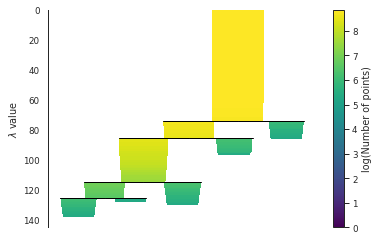

In [ ]:
hdbscan_pca.condensed_tree_.plot(log_size=True)


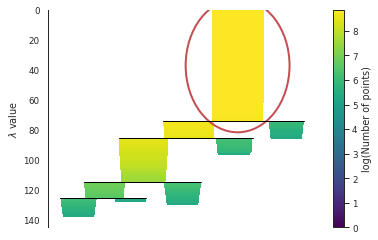

In [ ]:
hdbscan_pca.condensed_tree_.plot(select_clusters=True,log_size=True)

In [ ]:
from hdbscan import HDBSCAN
min_cluster_size = 200
min_samples = 20

hdbscan_pca_umap = HDBSCAN(min_cluster_size, min_samples, allow_single_cluster = True,metric='precomputed')
labels_pca_umap = hdbscan_pca_umap.fit_predict(pca_umap_diff_distancematrix)

labels_pca_umap

array([4, 4, 2, ..., 1, 1, 5])

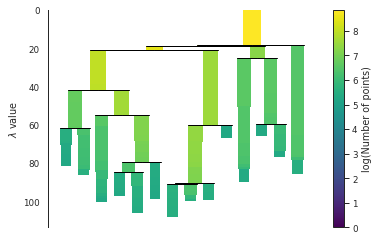

In [ ]:
hdbscan_pca_umap.condensed_tree_.plot(log_size=True)


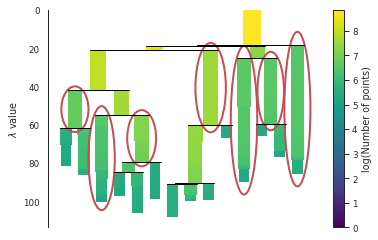

In [ ]:
hdbscan_pca_umap.condensed_tree_.plot(select_clusters=True,log_size=True)

In [ ]:
from hdbscan import HDBSCAN
min_cluster_size = 200
min_samples = 20

hdbscan_pca_space_no_diff = HDBSCAN(min_cluster_size, min_samples, allow_single_cluster = True,metric='precomputed')
labels_pca_space_no_diff = hdbscan_pca_space_no_diff.fit_predict(pca_distancematrix)



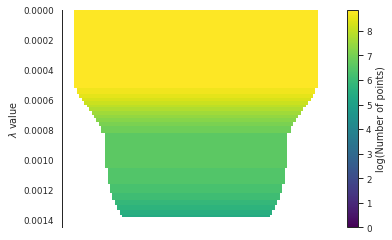

In [ ]:
hdbscan_pca_space_no_diff.condensed_tree_.plot(log_size=True)


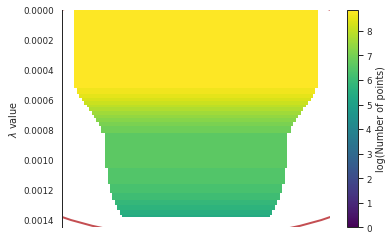

In [ ]:
hdbscan_pca_space_no_diff.condensed_tree_.plot(select_clusters=True,log_size=True)

In [ ]:
cls_pca =np.array(hdbscan_pca.labels_)

import numpy as np
numpy_hdbscanarray = cls_pca

parsing = {-1: 'Noise',
             0: 'A',
             1: 'B',
             2: 'C',
             3: 'D',
             4: 'E',
             5: 'F',
             6: 'G',
             7: 'H',
             8: 'J',
             9: 'K'
}

phoenetic = [parsing[cluster] for cluster in numpy_hdbscanarray]


In [ ]:
cls_pca =np.array(hdbscan_pca.labels_)
cls_pca=[parsing[cluster] for cluster in cls_pca]

cls_pca_umap =hdbscan_pca_umap.labels_
cls_pca_umap=[parsing[cluster] for cluster in cls_pca_umap]


cls_real= np.array(y_test).astype('int')
#cls_real=[parsing[cluster] for cluster in cls_real]

pca_space= np.array(labels_pca_space_no_diff)
pca_space=[parsing[cluster] for cluster in pca_space]

In [ ]:
df= pd.DataFrame([cls_pca,cls_pca_umap,cls_real,pca_space]).T.rename(columns = {0: 'HDBSCAN clusters of diffusion on PCA space', 1: 'HDBSCAN clusters of diffusion on PCA-UMAP space',2:'MNIST #',3:'HDBSCAN clusters of PCA space'}, inplace = False)
df

,HDBSCAN clusters of diffusion on PCA space,HDBSCAN clusters of diffusion on PCA-UMAP space,MNIST #,HDBSCAN clusters of PCA space
0,A,E,1,Noise
1,Noise,E,0,Noise
2,Noise,C,0,Noise
3,A,G,9,Noise
4,A,G,4,Noise
...,...,...,...,...
6995,A,B,5,Noise
6996,A,E,1,A
6997,A,B,3,Noise
6998,A,B,8,Noise


In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


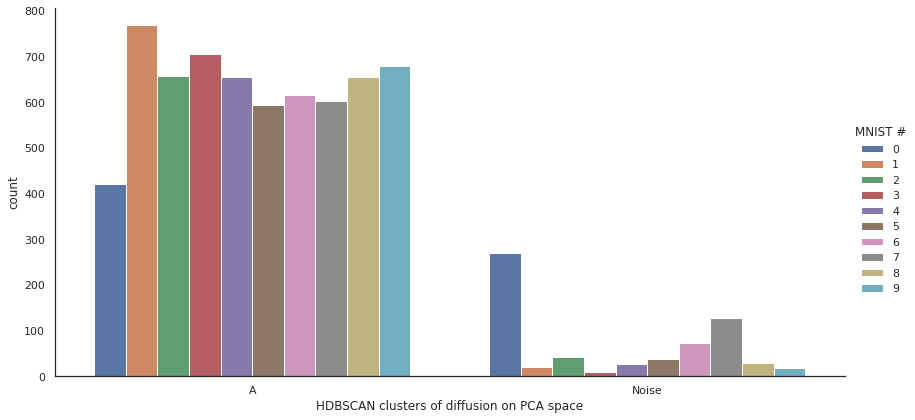

In [ ]:
#ax = sns.countplot(y="cls_pca_umap", hue="cls_real", data=df,orient='v')
g = sns.catplot(x="HDBSCAN clusters of diffusion on PCA space", hue="MNIST #",
                data=df, kind="count",
                height=6, aspect=2);


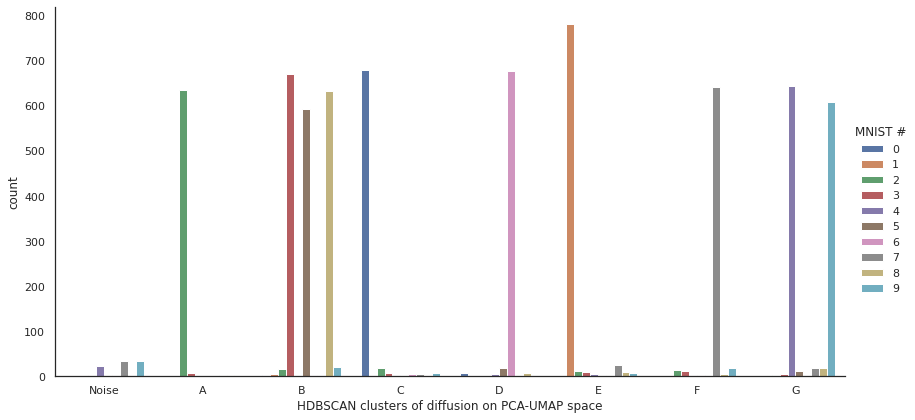

In [ ]:
#ax = sns.countplot(y="cls_pca_umap", hue="cls_real", data=df,orient='v')
g = sns.catplot(x="HDBSCAN clusters of diffusion on PCA-UMAP space", hue="MNIST #",
                data=df, kind="count",
                height=6, aspect=2,order=["Noise", "A",'B','C','D','E','F','G']);


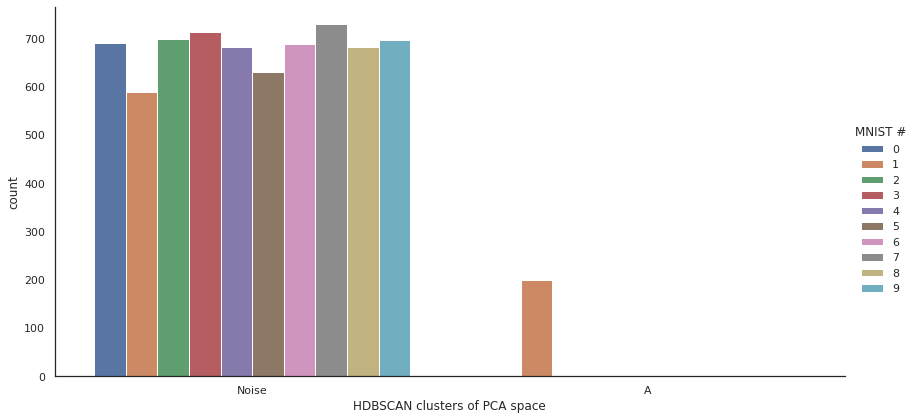

In [ ]:
#ax = sns.countplot(y="cls_pca_umap", hue="cls_real", data=df,orient='v')
g = sns.catplot(x="HDBSCAN clusters of PCA space", hue="MNIST #",
                data=df, kind="count",
                height=6, aspect=2,order=["Noise", "A"]);

In [ ]:
selection_palette=sns.color_palette('deep', 10)
selection_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

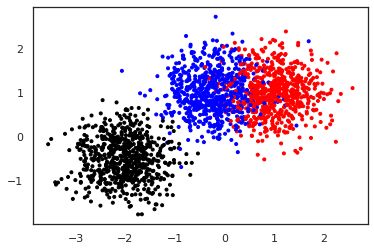

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-2, -0.5],[-0.2, +1]]
X, labels_true = make_blobs(
    n_samples=2000, centers=centers, cluster_std=0.5, random_state=0
)


# #############################################################################
# Plot result
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","black","blue"])
plt.scatter(X[:,0], X[:,1],marker='.', c=labels_true,cmap=cmap)


In [ ]:
cs=election_palette=sns.color_palette('deep', 8)

In [ ]:
cs

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373)]

In [ ]:
knn= 80
decay= 1
t=10
distance_matrix_dist =pdist(X)
distance_matrix_u_pca = (squareform(distance_matrix_dist))
n,m =distance_matrix_u_pca.shape

E = np.zeros((m,m))
knn_dst = np.sort(distance_matrix_u_pca, axis=1)
    
epsilon = knn_dst[:,knn]
    
    
pdx_scale = (distance_matrix_u_pca / epsilon).T 
    
E = np.exp(-1 * ( pdx_scale ** decay))
    
print(' afinity matrix done')
    
A = (E + E.T)
    
diff_deg = np.diag(np.sum(A,0))
    
diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

new_matrix_blobs=  np.linalg.matrix_power(diff_op, t)

 afinity matrix done


In [ ]:
distance_matrix_dist_blobs =squareform(pdist(new_matrix_blobs))
distance_matrix_dist_blobs

array([[0.        , 0.02003058, 0.02607945, ..., 0.00073815, 0.00137217,
        0.02535399],
       [0.02003058, 0.        , 0.00612865, ..., 0.01968513, 0.02129523,
        0.0054037 ],
       [0.02607945, 0.00612865, 0.        , ..., 0.02575988, 0.02731891,
        0.0007277 ],
       ...,
       [0.00073815, 0.01968513, 0.02575988, ..., 0.        , 0.00200812,
        0.02503331],
       [0.00137217, 0.02129523, 0.02731891, ..., 0.00200812, 0.        ,
        0.02659478],
       [0.02535399, 0.0054037 , 0.0007277 , ..., 0.02503331, 0.02659478,
        0.        ]])

In [ ]:
MDS_PLOT = sgd(distance_matrix_dist_blobs, n_components=2, random_state=None, init=None,num_dimensions=2)

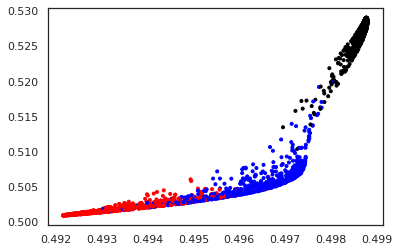

In [ ]:
plt.scatter(MDS_PLOT[:,0], MDS_PLOT[:,1],marker='.', c=labels_true,cmap=cmap)
